# Competance Project

## Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

### About Dataset

[https://www.kaggle.com/datasets/g1llar/poland-olx-house-price-q122](https://www.kaggle.com/datasets/g1llar/poland-olx-house-price-q122)

Analyses of the pricing and brand based on [OLX Portal](https://www.olx.pl/nieruchomosci/mieszkania/)

Features description:
- offer_title: offer title
- price: price in PLN
- price_per_meter: price in PLN for square meter
- offer_type: as value name
- floor: floor number for -1 --> basement, 0 --> Ground Floor, 10 --> floor 10+, 11 --> attic
- area: area in square meters
- rooms: number of rooms for 4 --> rooms 4+
- offer_type_of_building: as value name
- market: as value name
- city_name: name of city where home is
- voivodeship: name of voivodeship where home is
- month: data download month
- year: data download year
- population: city population where home is
- longitude``latitude: city coordinates

The original file has bad encoding. Scraped data should be interpreted as UTF-8 and added features (voivodeship) as ANSI.

Possible fix:
1. Convert to ANSI
2. Replace all 'Świętokrzyskie' to 'Swietokrzyskie'
3. Interpret as UTF-8
4. Replace all  'Swietokrzyskie' to 'Świętokrzyskie'

In [15]:
PATH = "../data/raw/olx_house_price_Q122.csv"


In [16]:
df_raw = pd.read_csv(PATH)


In [17]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)


In [18]:
df_raw.shape


(62818, 16)

In [19]:
display_all(df_raw.tail().T)


,62813,62814,62815,62816,62817
offer_title,Mieszkanie 4-pokojowe 57m2 parter,Mieszkanie 4-pokojowe spółdz. własność. z umeb...,Mieszkanie z lokalem użytkowym,Mieszkanie 80m2 przy lesie,"Duże, komfortowe mieszkanie blisko Parku Zdroj..."
price,230000.0,390000.0,330000.0,830000.0,990000.0
price_per_meter,4035.09,5735.29,2704.92,10375.0,9437.56
offer_type,Private,Private,Private,Private,Private
floor,0.0,1.0,1.0,1.0,3.0
area,57.0,68.0,122.0,80.0,104.9
rooms,4,4,4,4,4
offer_type_of_building,Housing Block,Housing Block,Other,Housing Block,Housing Block
market,aftermarket,aftermarket,aftermarket,aftermarket,aftermarket
city_name,Złocieniec,Łobez,Świdwin,Świnoujście,Świnoujście


In [20]:
display_all(df_raw.describe(include="all").T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_title,62818,29138,Sprzedam mieszkanie,1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,62818.0,NaN,NaN,NaN,399405.854865,2023250.514224,1.0,260000.0,345000.0,460000.0,504151616.0
price_per_meter,62818.0,NaN,NaN,NaN,7596.442371,36561.779747,0.02,5250.0,6576.845,8766.93,9002707.43
offer_type,62818,2,Private,45449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,61331.0,NaN,NaN,NaN,2.399749,2.15051,-1.0,1.0,2.0,3.0,11.0
area,61331.0,NaN,NaN,NaN,91.251837,3153.663628,1.0,42.0,51.2,63.0,399000.0
rooms,62818.0,NaN,NaN,NaN,2.515378,0.826473,1.0,2.0,2.0,3.0,4.0
offer_type_of_building,61331,5,Housing Block,43868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,62818,2,aftermarket,55171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,62818,611,Warszawa,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_raw.corr()


/tmp/ipykernel_112896/3162014398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.corr()


,price,price_per_meter,floor,area,rooms,year,population,longitude,latitude
price,1.000000,0.981488,0.001277,0.000295,0.040408,NaN,0.050284,0.001003,0.009655
price_per_meter,0.981488,1.000000,0.004335,-0.002520,-0.017683,NaN,0.053226,0.005617,0.007212
floor,0.001277,0.004335,1.000000,-0.005635,0.013448,NaN,0.118033,0.041130,-0.032957
area,0.000295,-0.002520,-0.005635,1.000000,-0.000252,NaN,0.003224,-0.001409,0.007318
rooms,0.040408,-0.017683,0.013448,-0.000252,1.000000,NaN,-0.070297,0.007835,0.036158
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,0.050284,0.053226,0.118033,0.003224,-0.070297,NaN,1.000000,0.182673,-0.022828
longitude,0.001003,0.005617,0.041130,-0.001409,0.007835,NaN,0.182673,1.000000,-0.172376
latitude,0.009655,0.007212,-0.032957,0.007318,0.036158,NaN,-0.022828,-0.172376,1.000000


### Look at the data

#### Missing values

In [22]:
display_all(
    pd.DataFrame(
        {
            "number": df_raw.isnull().sum(),
            "percentage": df_raw.isnull().sum().sort_values(ascending=False)
            / len(df_raw),
        }
    )
)


,number,percentage
area,1487,0.023672
city_name,0,0.000000
floor,1487,0.023672
latitude,0,0.000000
longitude,0,0.000000
market,0,0.000000
month,0,0.000000
offer_title,0,0.000000
offer_type,0,0.000000
offer_type_of_building,1487,0.023672


In [23]:
df_raw.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_title,62818,29138,Sprzedam mieszkanie,1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,62818.0,NaN,NaN,NaN,399405.854865,2023250.514224,1.0,260000.0,345000.0,460000.0,504151616.0
price_per_meter,62818.0,NaN,NaN,NaN,7596.442371,36561.779747,0.02,5250.0,6576.845,8766.93,9002707.43
offer_type,62818,2,Private,45449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,61331.0,NaN,NaN,NaN,2.399749,2.15051,-1.0,1.0,2.0,3.0,11.0
area,61331.0,NaN,NaN,NaN,91.251837,3153.663628,1.0,42.0,51.2,63.0,399000.0
rooms,62818.0,NaN,NaN,NaN,2.515378,0.826473,1.0,2.0,2.0,3.0,4.0
offer_type_of_building,61331,5,Housing Block,43868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,62818,2,aftermarket,55171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,62818,611,Warszawa,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_raw[df_raw["floor"].isnull()].describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_title,1487,672,Sprzedam mieszkanie,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1487.0,NaN,NaN,NaN,417619.282112,351042.733482,1190.0,260000.0,340000.0,473806.0,4200000.0
price_per_meter,1487.0,NaN,NaN,NaN,8231.820545,21830.908497,16.36,4814.81,6200.0,8500.0,425000.0
offer_type,1487,2,Private,910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,1487.0,NaN,NaN,NaN,2.621385,0.917836,1.0,2.0,3.0,3.0,4.0
offer_type_of_building,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1487,2,aftermarket,1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,1487,228,Warszawa,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Area can be calculated from `price` and `price_per_meter`.
Houses with missing values are approx. 8% more expensive

#### Types

In [25]:
df_raw.dtypes


offer_title                object
price                     float64
price_per_meter           float64
offer_type                 object
floor                     float64
area                      float64
rooms                       int64
offer_type_of_building     object
market                     object
city_name                  object
voivodeship                object
month                      object
year                        int64
population                  int64
longitude                 float64
latitude                  float64
dtype: object

#### Features

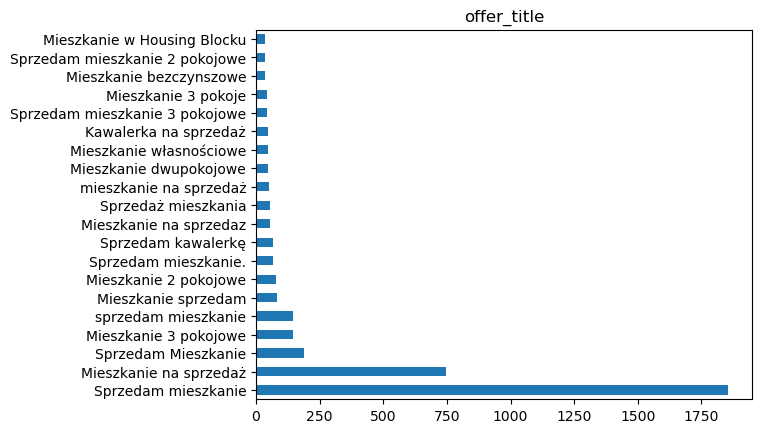

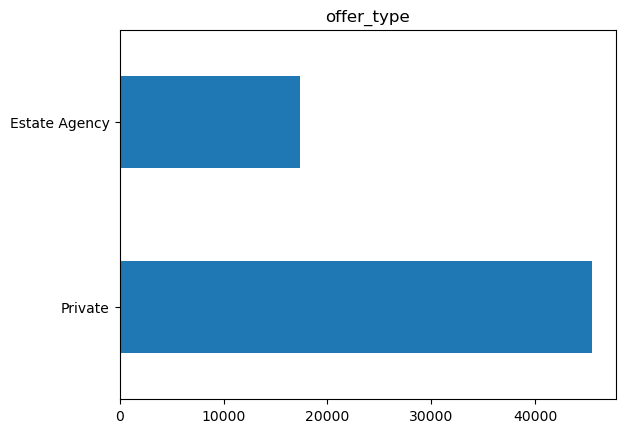

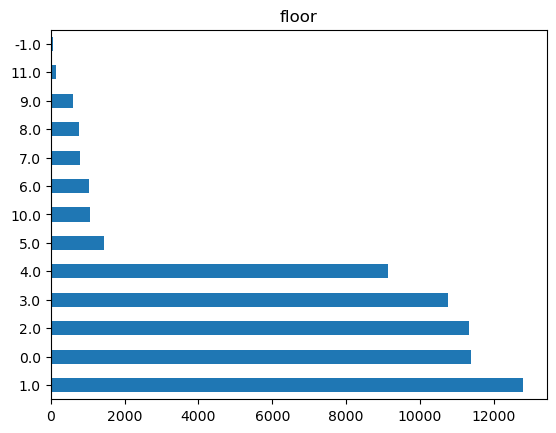

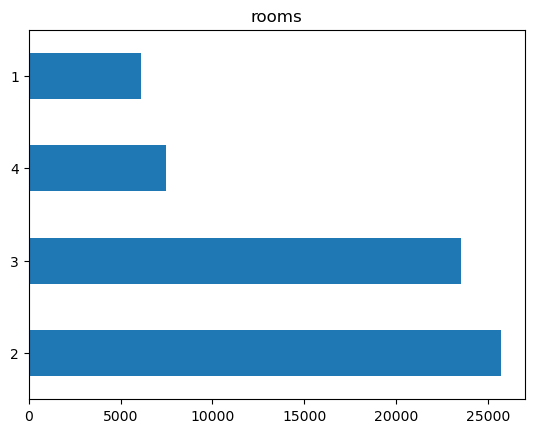

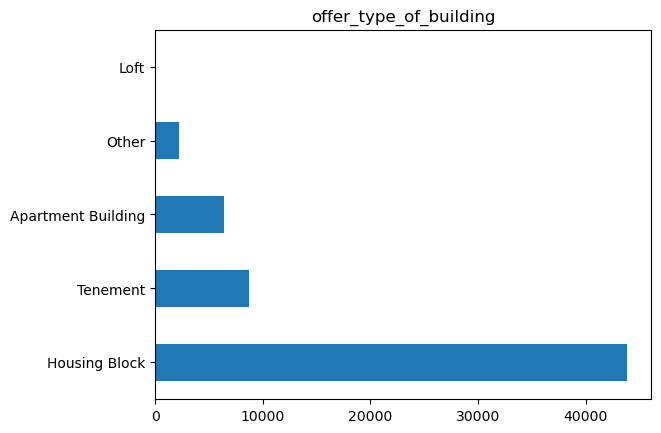

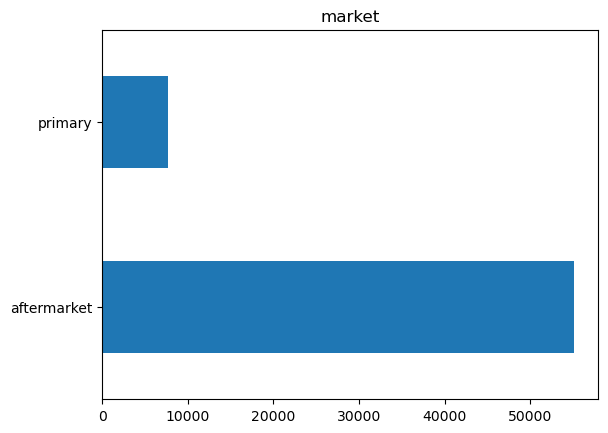

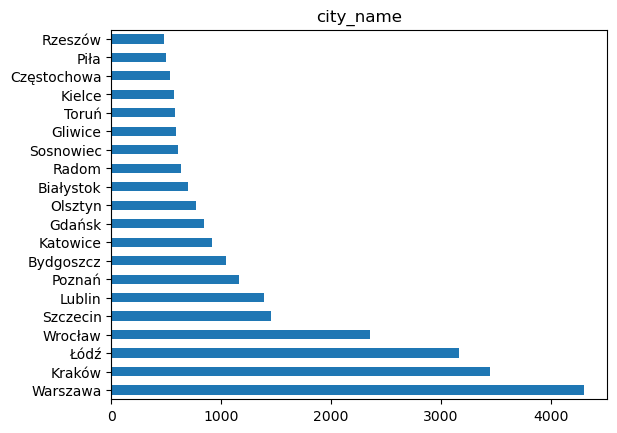

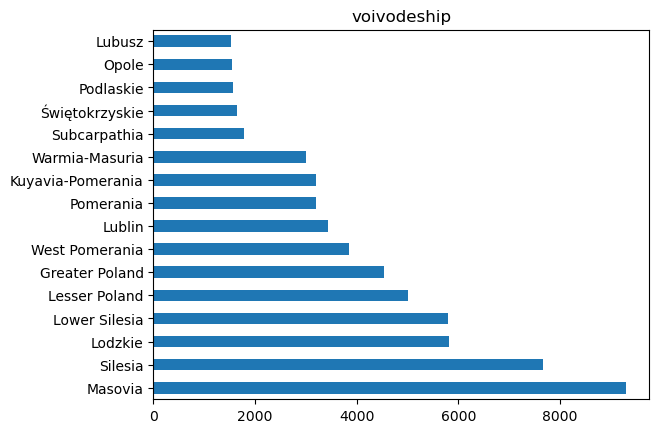

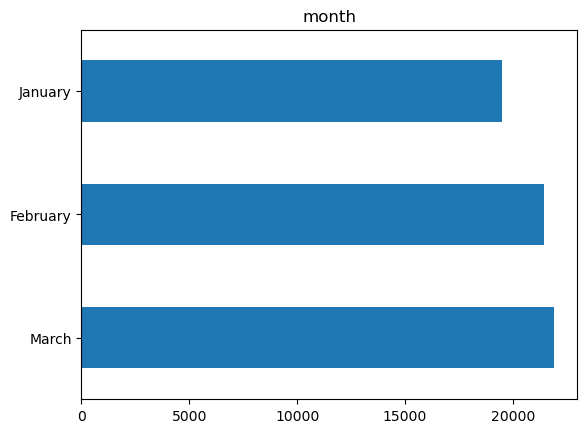

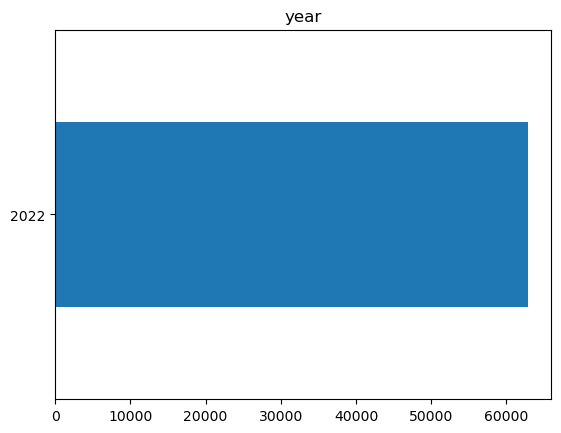

In [26]:
to_be_ploted = [
    "offer_title",
    "offer_type",
    "floor",
    "rooms",
    "offer_type_of_building",
    "market",
    "city_name",
    "voivodeship",
    "month",
    "year",
]

for feature in to_be_ploted:
    plt.figure()
    df_raw[feature].value_counts().sort_values(ascending=False).head(20).plot(
        kind="barh", title=feature
    )

plt.show()
